# 문제 1

#### dataset : pima-indians-diabetes-database [kaggle link](pima-indians-diabetes-database) - added post-processing
/kaggle/input/adpkrp5/data1.csv

### 1-1 탐색적 데이터 분석 수행(시각화 포함)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/adpkrp5/data1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# 혹시나 해서 한 번더
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# 기초통계량 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


In [5]:
# BloodPressure, BMI, Age에 뭔가 이상치가 조금 있는 것 같음
# 0일 수가 없는데 그리고 9999는 뭐냐
# 상자그림을 그려봐야겠다.

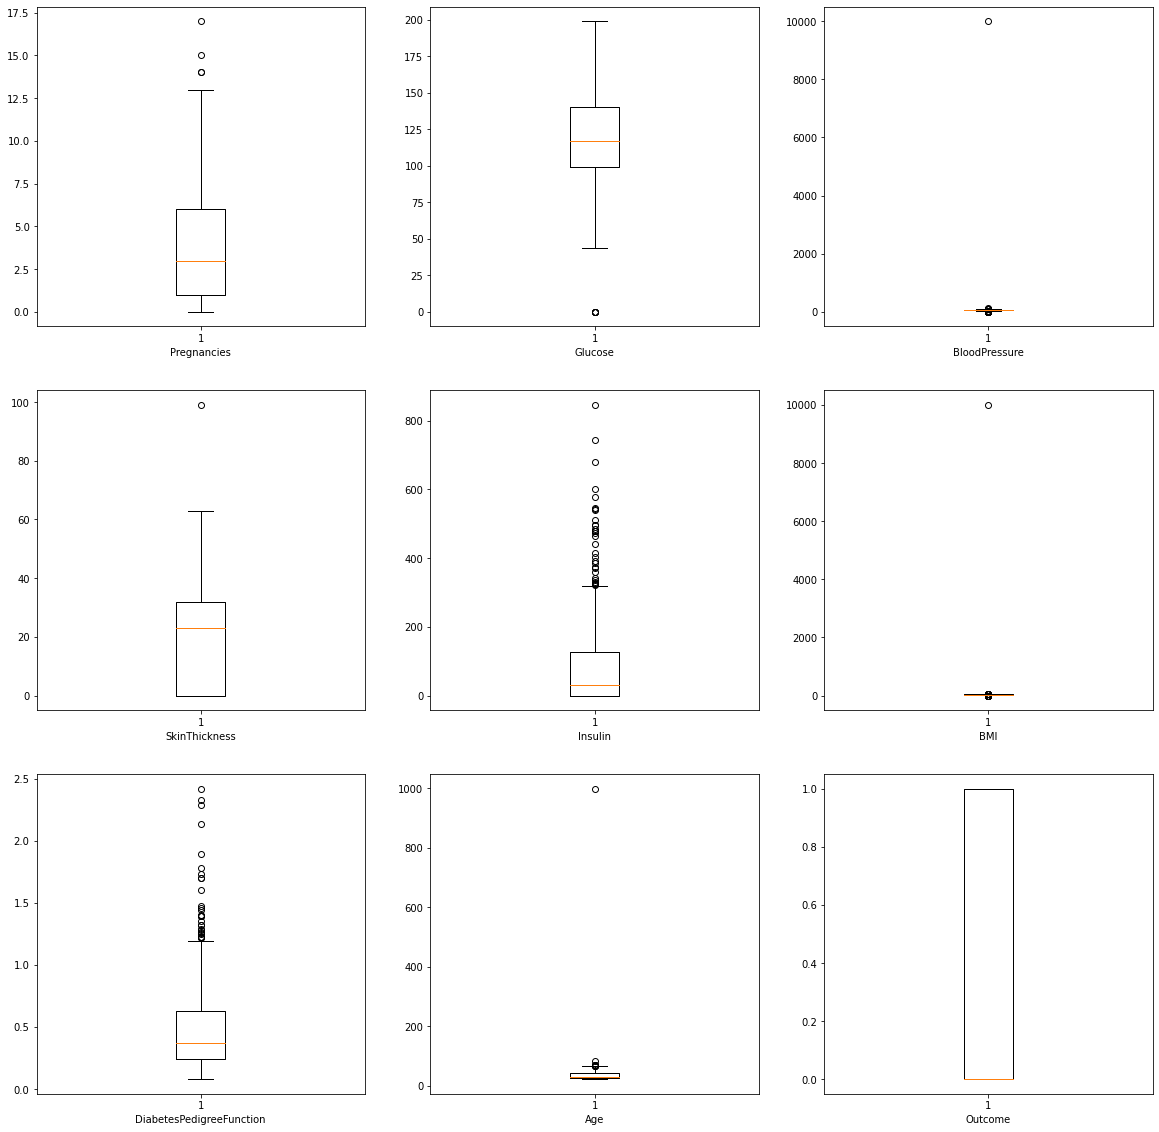

In [6]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
plt.boxplot(df['Pregnancies'])
plt.xlabel('Pregnancies')

plt.subplot(3, 3, 2)
plt.boxplot(df['Glucose'])
plt.xlabel('Glucose')

plt.subplot(3, 3, 3)
plt.boxplot(df['BloodPressure'])
plt.xlabel('BloodPressure')

plt.subplot(3, 3, 4)
plt.boxplot(df['SkinThickness'])
plt.xlabel('SkinThickness')

plt.subplot(3, 3, 5)
plt.boxplot(df['Insulin'])
plt.xlabel('Insulin')

plt.subplot(3, 3, 6)
plt.boxplot(df['BMI'])
plt.xlabel('BMI')

plt.subplot(3, 3, 7)
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')

plt.subplot(3, 3, 8)
plt.boxplot(df['Age'])
plt.xlabel('Age')

plt.subplot(3, 3, 9)
plt.boxplot(df['Outcome'])
plt.xlabel('Outcome')

plt.show()

일단 이상치있는 건 확인했고, 처리는 1-2번에서 하자.
그리고 이번에는 상관관계를 확인하기 위해 상관계수 히트맵을 그린다.

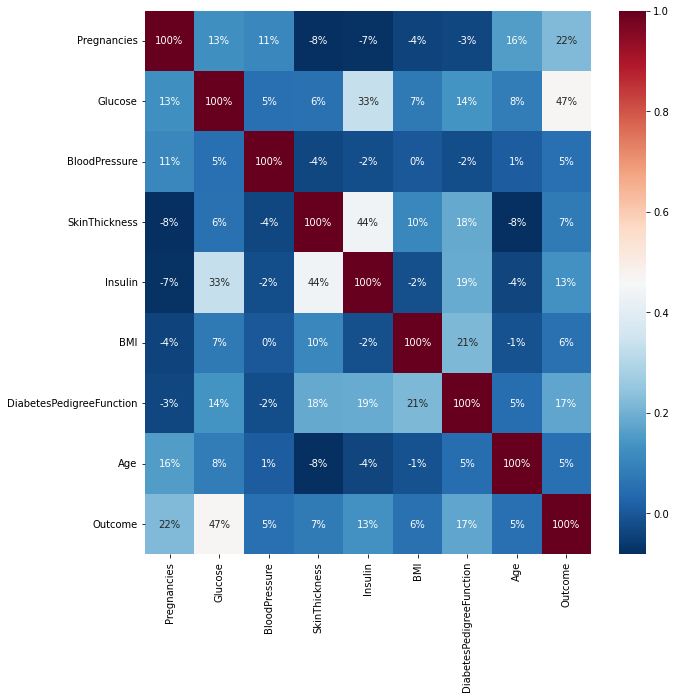

In [7]:
df_corr = df.corr(method = 'pearson')
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, cmap = 'RdBu_r', annot = True, fmt = '.0%')
plt.show()

상관관계가 큰 것은 보이지 않는다.

따라서 다중공선성은 의심하지 않아도 될 것 같다.

마지막으로 하나씩 히스토그램 그려보기

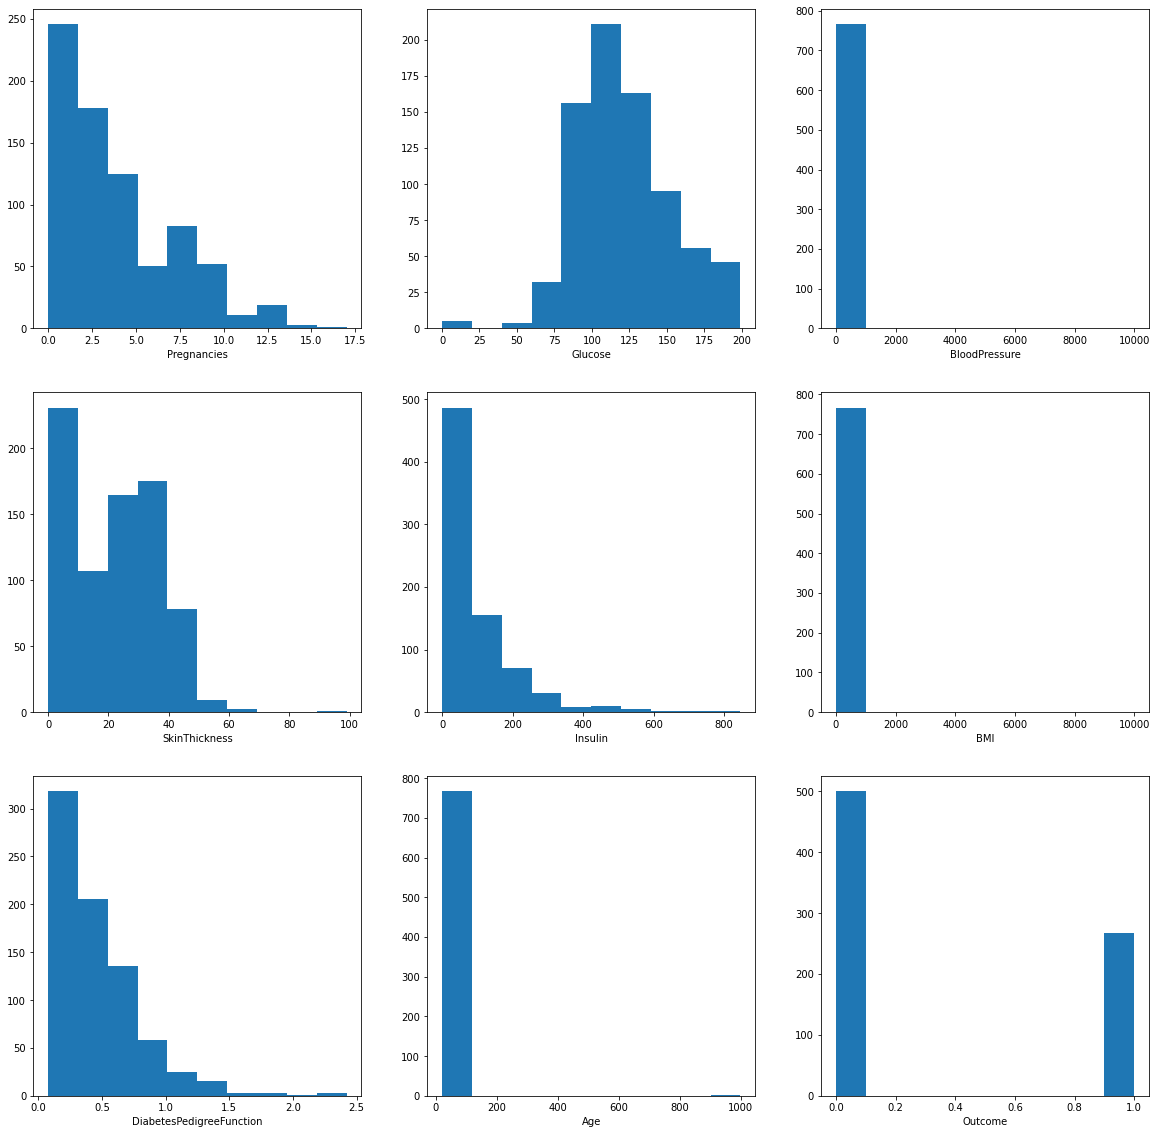

In [8]:
plt.figure(figsize = (20, 20))
for (col, i) in zip(df.columns, range(1, 10)):
    plt.subplot(3, 3, i)
    plt.hist(df[col])
    plt.xlabel(col)
plt.show()

### 1-2 이상치 처리(이상값 대체방안 제시)

* 데이터의 수가 매우 많고 이상치가 존재하는 행이 전체 데이터에 비해 많지 않은 경우 이상치가 존재하는 행 전체를 삭제할 수 있다.
* 만약 대체한다면 변수의 특징에 따라 평균, 중앙값, 최빈값과 같은 대푯값을 선정하여 대체할 수 있다.

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

이번에는 중앙값으로 대체하고자 한다.

이때, 이상치를 제외한 상태에서의 중앙값으로 대체하겠다.

수염 밖의 값까지 포함한 경우의 중앙값과 같은 경우도 있고, 다른 경우도 있다.

무튼 Outcome을 제외한 나머지 변수의 이상치를 수염 내의 값들에 대한 중앙값으로 대체해주자.

추가로, 각 피처별 값이 0인 경우가 말이 되지 않으므로 이것도 중앙값으로 대체해주자.

In [10]:
q1_series = df.describe().loc['25%']
median_series = df.describe().loc['50%']
q3_series = df.describe().loc['75%']
iqr_series = q3_series - q1_series

low_whis_series = q1_series - 1.5 * iqr_series
upper_whis_series = q3_series + 1.5 * iqr_series

df_for_0 = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
df_for_999 = df[['BloodPressure', 'BMI', 'Age']]

print(median_series)

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
Name: 50%, dtype: float64


In [11]:
for col in df_for_0.columns:
    df.loc[df[col] == 0, [col]] = median_series[col]

for col in df_for_999.columns:
    df.loc[(df[col] == 999) | (df[col] == 9999), [col]] = median_series[col]

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.332031,27.334635,94.652344,32.415234,0.471876,33.184896,0.348958
std,3.369578,30.438286,12.002843,9.229014,105.547598,6.806084,0.331329,11.677531,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.525000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


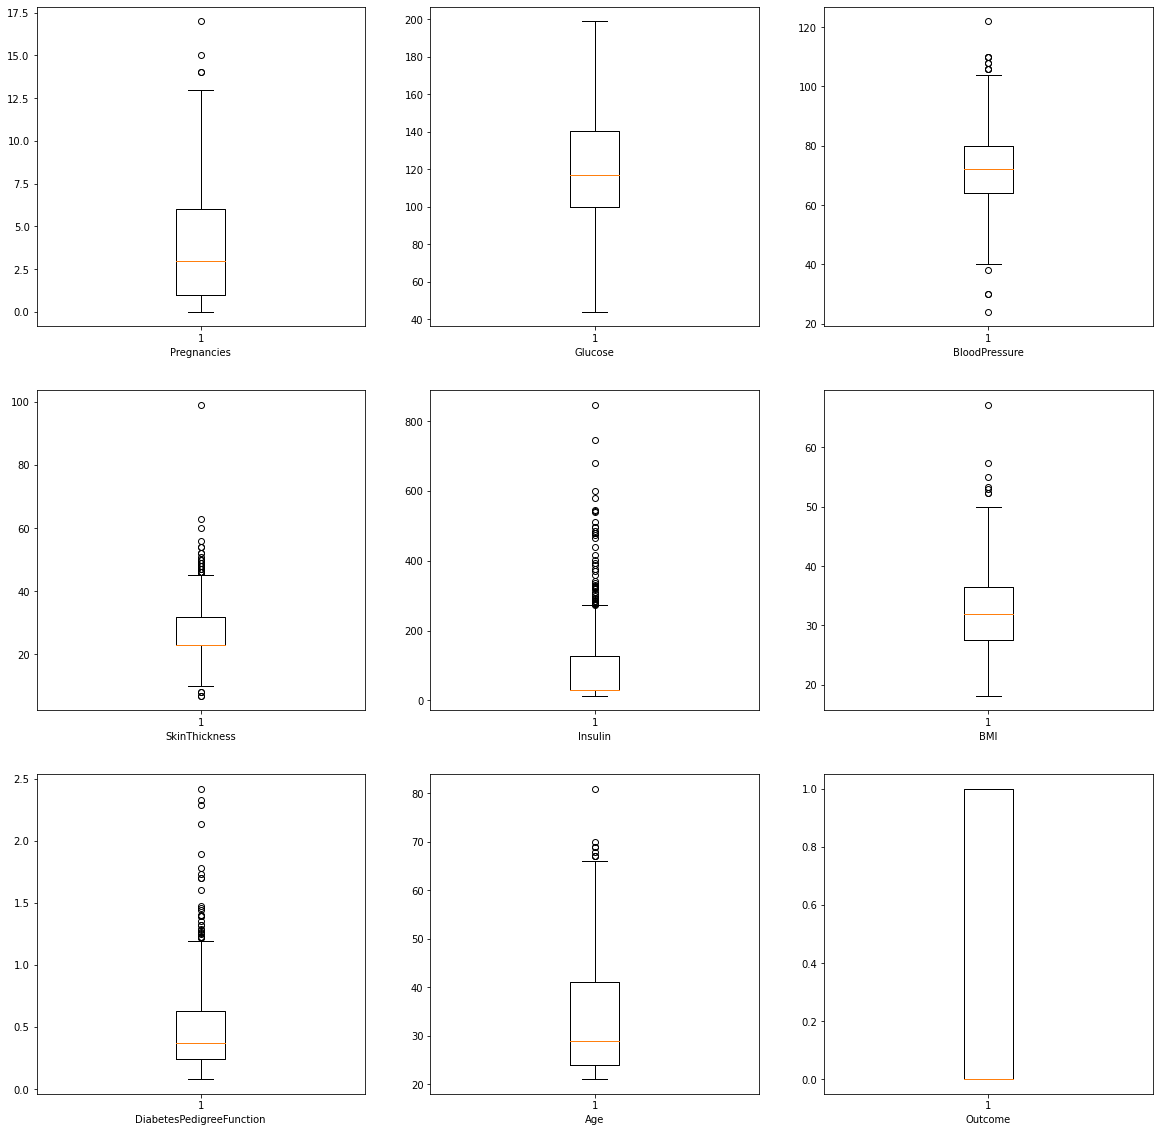

In [12]:
# 다시 그리는 상자그림
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
plt.boxplot(df['Pregnancies'])
plt.xlabel('Pregnancies')

plt.subplot(3, 3, 2)
plt.boxplot(df['Glucose'])
plt.xlabel('Glucose')

plt.subplot(3, 3, 3)
plt.boxplot(df['BloodPressure'])
plt.xlabel('BloodPressure')

plt.subplot(3, 3, 4)
plt.boxplot(df['SkinThickness'])
plt.xlabel('SkinThickness')

plt.subplot(3, 3, 5)
plt.boxplot(df['Insulin'])
plt.xlabel('Insulin')

plt.subplot(3, 3, 6)
plt.boxplot(df['BMI'])
plt.xlabel('BMI')

plt.subplot(3, 3, 7)
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')

plt.subplot(3, 3, 8)
plt.boxplot(df['Age'])
plt.xlabel('Age')

plt.subplot(3, 3, 9)
plt.boxplot(df['Outcome'])
plt.xlabel('Outcome')

plt.show()

### 1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

* 혈압이 24일 수 있는지 현업의 전문가와 논의 후 처리가 필요하다.
* 이외에도 SkinThickness, Insulin, BMI, DiabetesPedigreeFunction에 대해서는 전문가와 논의 후 처리가 필요해보인다.
* 상관계수가 큰 피처들이 존재하지 않으므로 다중공선성을 배제하기 위한 처리는 필요하지 않아 보인다.

# 문제 2

### 2-1 오버샘플링 과정 설명하고 결과 작성

 * 오버 샘플링 기법은 비중이 적은 데이터를 추가로 생성해 수를 늘려 데이터 불균형을 극복하는 기법이다.
    * 언더 샘플링은 데이터 손실의 문제로 예측 성능이 저하되는 단점이 있으므로, 일반적으로는 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.

 * 이때, 오버 샘플링은 Random Oversampling과 SMOTE로 구분할 수 있는데,

> Random Oversampling은
* 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.
* 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.
* 이에 따라 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.

> 한편, SMOTE는
* 적은 데이터 세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
* SMOTE는 Random Oversampling보다 처리 속도가 느리다는 단점이 잇지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있는 장점이 있다.

일단 이번에는 Random Oversampling을 선정한다.


---
오버 샘플링(Over Sampling) - (imblearn : imbalanced-learn)

소수의 레이블을 지닌  데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 중식시키는 기범

데이터의 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용한다.

In [13]:
# 종속변수인 Class에 대하여 Random Oversamplig
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state = 731)

y=df.pop('Outcome')
x=df

import time
# Random Oversampling
ros_start_time = time.time() # 시작 시간
x_ros, y_ros = ros.fit_resample(x, y)
ros_end_time = time.time() # 종료 시간
print('ros_time : ', ros_end_time - ros_start_time)
print(Counter(y_ros))

ros_time :  0.008733272552490234
Counter({1: 500, 0: 500})


### 2-2 언더샘플링 과정 설명하고 결과 작성

언더 샘플링(Under Sampling) - (imblearn : imbalanced-learn)

다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소시키는 기법

데이터 불균형으로 인한 문제는 피할 수 있지만 전체 데이터의 수가 급감하여 오히려 학습 성능을 떨어뜨릴 수도 있다.

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 731)

# Random Oversampling
rus_start_time = time.time() # 시작 시간
x_rus, y_rus = rus.fit_resample(x, y)
rus_end_time = time.time() # 종료 시간
print('rus_time : ', rus_end_time - rus_start_time)
print(Counter(y_rus))

rus_time :  0.007550716400146484
Counter({0: 268, 1: 268})


In [15]:
print('before : ', Counter(y))
print('ros ', Counter(y_ros))
print('rus : ', Counter(y_rus))

before :  Counter({0: 500, 1: 268})
ros  Counter({1: 500, 0: 500})
rus :  Counter({0: 268, 1: 268})


### 2-3 둘 중 선택하고 이유 설명

오버샘플링을 선택한다.
데이터가 부족한 것 보다는 충분한 것이 좋다.

# 문제 3

### 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

로지스틱 회귀, 랜덤 포레스트, SVM을 제시한다.

로지스틱 회귀는
* 선형 모델을 분류에 사용해 특정 클래스에 속할 확률을 추정하는 데 사용할 수 있다.
* 반응변수가 범주형인 경우 적용하는 회귀분석을 로지스틱 회귀분석이라 한다.
* 이때, Outcome이 0, 1로 이루어져 있으므로 로지스틱 회귀가 가능하다.

랜덤 포레스트는
* 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형 결합하여 최종 학습기를 만드는 방법이다.
* 수천 개의 변수를 변수 제거 없이 모델링하므로 정확도 측면에서 좋은 성과를 보이는 기법 중 하나이다.
* 이론적 설명이나 최종 결과 해석이 어렵다는 단점이 있지만, 예측력이 매우 높은 것으로 알려져 있다.
* 입력변수가 많은 경우 배깅 및 부스팅과 비슷하거나 더 좋은 예측력을 보인다.

SVM은
* 새로운 데이터가 입력되었을 때, 기존 데이터를 활용해 분류하는 방법
* 패턴인식, 자료분석 등을 위한 지도학습 모델로 회귀와 분류 문제 해결에 사용되는 알고리즘이다.
* SVM은 최대 마진 분류기(Maximal Margin Classifier)를 일반화한 것이다.
  * 최대 마진 분류기의 단점을 극복하고 확장성을 넓힌 것이 SVC(Support Vector Classifier)이다.
  * SVC를 더 확장하고 비선형 클래스 경계를 수용하기 위해 SVM이 고안되었다.
  
그리고 정확도 측면의 모델은 랜덤 포레스트, 속도 측면의 모델은 로지스틱 회귀로 선정한다.

In [16]:
# train, test 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state = 731, test_size = 0.3, stratify = y_ros)

# 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)

In [17]:
# 1. LR(로지스틱 회귀)
# GridSerchCV를 통해 최적 하이퍼 파라미터 찾기

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state = 731)

param_lr = {"max_iter" : [10, 50, 100, 200],
           "penalty" : ['l1', 'l2'],
           "fit_intercept" : [True, False]}

gscv_lr = GridSearchCV(estimator = lr, param_grid = param_lr, scoring = 'accuracy', cv = 3)

gscv_lr.fit(x_train_scaled, y_train)

print('best params : ', gscv_lr.best_params_)
print('accuracy : {:.4f}'.format(gscv_lr.best_score_))

best params :  {'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2'}
accuracy : 0.7400


In [18]:
# LR 성능평가

# 시간
lr_best = LogisticRegression(fit_intercept = True, max_iter = 50, penalty = 'l2', random_state = 731)

import time

lr_start_time = time.time()
lr_best.fit(x_train_scaled, y_train)
lr_end_time = time.time()

학습 시간 :  0.007427215576171875 초
정확도	74%
정밀도	75%
재현율	71%
F1	73%


In [19]:
# 2. RF(랜덤 포레스트)
# GridSearchCV를 통한 최적의 하이퍼 파라미터 찾기

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=731)

param_rf = {"n_estimators" : [10, 50, 100, 200, 500],
           "min_samples_split" : [3, 5, 7, 9],
           "criterion" : ['gini', 'entropy']}

gscv_rf = GridSearchCV(estimator = rf, param_grid = param_rf, scoring = 'accuracy', cv = 3)

gscv_rf.fit(x_train_scaled, y_train)

print('best params : ', gscv_rf.best_params_)
print('accuracy : {:.4f}'.format(gscv_rf.best_score_))

best params :  {'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 100}
accuracy : 0.8128


In [20]:
# RF 성능평가

# 시간
rf_best = RandomForestClassifier(random_state = 731, criterion = 'gini', n_estimators = 100, min_samples_split = 5)

import time

rf_start_time = time.time()
rf_best.fit(x_train_scaled, y_train)
rf_end_time = time.time()
print("학습 시간 : ", rf_end_time - rf_start_time, "초")


# 정확도
rf_pred = rf_best.predict(x_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, rf_pred)
test_prc = precision_score(y_test, rf_pred)
test_rcll = recall_score(y_test, rf_pred)
test_f1 = f1_score(y_test, rf_pred)

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.2692527770996094 초
정확도	82%
정밀도	82%
재현율	83%
F1	82%


### 3-2 모델 비교하고 결과 설명

학습시간은 로지스틱회귀가 압도적으로 높으나, 정확도 측면에서는 랜덤 포레스트가 압도적으로 높았다.
현업의 상황을 파악하고, 속도가 우선시되는 상황이라면 로지스틱회귀 모델을, 시간이 오래 걸려도 좋으니 정확한 결과가 필요한 상황이라면 랜덤 포레스트 모델을 추천한다.

### 3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

### 차원 축소
#### 설명변수 선택
* 차원을 축소하는 가장 간단한 방법은 자료를 설명하는 데 몇 가지의 설명변수만을 선택하여 분석에 사용하는 것이다.
* 가장 간단하고 해석이 쉬운 방법으로 유용하지 않거나 상관관계까 높은 컬럼은 제거한다.
* 하지만 설명변수간의 고차원적인 상관관계는 고려하기 어렵다는 단점이 있다.

#### 주성분 분석(PCA : Principle Component Analysis)
* 차원 축소에서 가장 많이 사용되는 차원 추출의 방법
* 여러 변수 간에 존재하는 상관관계를 이용하는 차원 축소 방법
  * 데이터를 축에 사영했을 때 분산이 가장 높은 축을 찾아0 그 축을 새로운 주성분으로 결정하는 방법
* 가장 큰 분산을 기반으로 첫 번째 축을 생성하고, 이 벡터 축에 직각이 되는 벡터를 두 번째 축으로 선택한다.
* 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 축으로 설정한다
  * 그런데 이렇게 하면 첫 번째 주성분과 세 번째 주성분이 연관이 생기는 것 아닌가?

In [21]:
# 주성분 분석을 통한 차원 축소 진행

# 스케일링
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
ㅂ
x_scaled = pd.DataFrame(scaler.fit_transform(x_ros), columns = x.columns)

# 주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca_fit = pca.fit(x_scaled)

print('고윳값 : ', pca.singular_values_)
print('분산 설명력 : ', pca.explained_variance_ratio_)

고윳값 :  [46.04782931 39.70770431 32.93488254 29.73774728 28.15281198 24.83179232]
분산 설명력 :  [0.26505032 0.19708772 0.13558831 0.1105417  0.0990726  0.07707724]


5개의 주성분을 선택할 때, 전체 데이터의 분산의 약 80%를 설명할 수 있으므로, 주성분의 개수를 5개로 설정한다.

결과적으로, 8개의 설명변수에서 차원축소를 통해 5개의 설명변수만 남긴다.

In [22]:
pca = PCA(n_components = 5)
principal_x = pd.DataFrame(pca.fit_transform(x_ros), columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
principal_x.head()

,pc1,pc2,pc3,pc4,pc5
0,-62.236244,30.652749,5.366366,5.465422,12.260986
1,-68.450425,-34.897286,-1.296847,0.819882,5.219566
2,-59.251109,60.516978,-21.668966,4.390558,-0.951098
3,-4.988756,-38.687155,-8.015519,-2.121234,-3.920833
4,73.722150,1.272321,-22.920787,-0.520706,22.984845


In [23]:
# 새로 만든 주성분들을 통해 모델 돌리기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(principal_x, y_ros, stratify = y_ros, 
                                                    test_size = 0.3, random_state = 731)

In [24]:
# 1. LR(로지스틱 회귀)
# GridSerchCV를 통해 최적 하이퍼 파라미터 찾기

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression(random_state = 731)

param_lr = {"max_iter" : [10, 50, 100, 200],
           "penalty" : ['l1', 'l2'],
           "fit_intercept" : [True, False]}

gscv_lr = GridSearchCV(estimator = lr, param_grid = param_lr, scoring = 'accuracy', cv = 3)

gscv_lr.fit(x_train, y_train)

print('best params : ', gscv_lr.best_params_)
print('accuracy : {:.4f}'.format(gscv_lr.best_score_))

best params :  {'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2'}
accuracy : 0.7057


In [25]:
# LR 성능평가

# 시간
lr_best = LogisticRegression(fit_intercept = True, max_iter = 50, penalty = 'l2', random_state = 731)

import time

lr_start_time = time.time()
lr_best.fit(x_train, y_train)
lr_end_time = time.time()
print("학습 시간 : ", lr_end_time - lr_start_time, "초")

# 정확도
lr_pred = lr_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, lr_pred)
test_prc = precision_score(y_test, lr_pred)
test_rcll = recall_score(y_test, lr_pred)
test_f1 = f1_score(y_test, lr_pred)

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.01390385627746582 초
정확도	73%
정밀도	73%
재현율	72%
F1	72%


In [26]:
# 2. RF(랜덤 포레스트)
# GridSearchCV를 통한 최적의 하이퍼 파라미터 찾기

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=731)

param_rf = {"n_estimators" : [10, 50, 100, 200, 500],
           "min_samples_split" : [3, 5, 7, 9],
           "criterion" : ['gini', 'entropy']}

gscv_rf = GridSearchCV(estimator = rf, param_grid = param_rf, scoring = 'accuracy', cv = 3)

gscv_rf.fit(x_train, y_train)

print('best params : ', gscv_rf.best_params_)
print('accuracy : {:.4f}'.format(gscv_rf.best_score_))

best params :  {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 200}
accuracy : 0.7843


In [27]:
# RF 성능평가

# 시간
rf_best = RandomForestClassifier(random_state = 731, criterion = 'gini', n_estimators = 100, min_samples_split = 5)

import time

rf_start_time = time.time()
rf_best.fit(x_train, y_train)
rf_end_time = time.time()
print("학습 시간 : ", rf_end_time - rf_start_time, "초")


# 정확도
rf_pred = rf_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, rf_pred)
test_prc = precision_score(y_test, rf_pred)
test_rcll = recall_score(y_test, rf_pred)
test_f1 = f1_score(y_test, rf_pred)

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.28507375717163086 초
정확도	81%
정밀도	77%
재현율	88%
F1	82%


### 결과
* 기존 8개의 설명변수에서 차원축소를 통해 5개의 설명변수만 남겼을 때, 학습 시간이 짧아졌지만, 많이 줄지는 않았다.
* 정확도 측면에서도 설명변수가 많이 줄어들지 않아 많이 낮아지지 않았다.
* 다만, 랜덤 포레스트 모델의 경우 정밀도가 눈에 띄게 낮아졌는데, 현업에서 정밀도를 중요시한다면, 차원축소를 하지 않는 것이 좋을 것 같다.

# 문제 4 
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

In [28]:
df4 = pd.read_csv('/kaggle/input/adpkrp5/content.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


#### dataset : /kaggle/input/adpkrp5/content.csv

### 4-1 연구가설과 귀무가설 작성

* 연구가설 : 해당 제조사의 금속 재질 함유량의 분산은 1.3이라 할 수 있다.
* 귀무가설 : 해당 제조사의 금속 재질 함유량의 분산은 1.3이라 할 수 없다.

### 4-2 양측 검정

In [29]:
import numpy as np
from scipy.stats import chi2 # 양측 검정이라 2인가

def var_test(x, va0, direction = 'two-tailed', alpha = 0.05):
    # x : df
    # va0 : 비교하고자 하는 값으로 여기서는 1.3
    # alpha : 유의수준
    n = len(x)
    Q = (n-1) * np.var(x) / va0
    print("direction : ", direction)
    if direction  == 'lower':
        q = chi2.ppf(alpha, n-1)
        if Q <= q:
            return "귀무가설 기각"
        else:
            return "귀무가설 채택"
    elif direction  == 'upper':
        q = chi2.ppf(1-alpha, n-1)
        if Q >= q:
            return "귀무가설 기각"
        else:
            return "귀무가설 채택"
    else:
        q1 = chi2.ppf(alpha/2, n-1)
        q2 = chi2.ppf(1-(alpha/2), n-1)
        print('Q', Q)
        print('q1', q1)
        print('q2', q2)
        if Q <= q1 or Q >= q2:
            return "귀무가설 기각"
        else:
            return "귀무가설 채택"
        
var_test(df4['content'], va0 = 1.3)

direction :  two-tailed
Q 326.6508365405755
q1 161.82618239364686
q2 239.9596818276442


'귀무가설 기각'

### 4-3 검정통계량, 가설 채택

검정통계량은 326.65이고, 이는 q2보다 크므로 귀무가설을 기각하고 연구가설을 채택한다.

즉, 금속 성분 함유량의 분산은 1.3이라고 할 수 없다.

근데 p-value를 어떻게 구하는지 모르겠다

# 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)    
/kaggle/input/adpkrp5/error.csv

In [30]:
import pandas as pd 

df_5 = pd.read_csv('/kaggle/input/adpkrp5/error.csv')
df_5.columns = ['lot_number', 'error_case_number']

df_5.describe()

,lot_number,error_case_number
count,100.000000,100.000000
mean,50.500000,3.410000
std,29.011492,3.316153
min,1.000000,0.000000
25%,25.750000,1.500000
50%,50.500000,3.000000
75%,75.250000,4.500000
max,100.000000,19.000000


### 5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [31]:
df_5['error_case_rate'] = (df_5['error_case_number'] / 200)* 100

import numpy as np

cl = df_5['error_case_rate'].mean()
sigma = np.std(df_5['error_case_rate'])
ucl = cl + 3 * sigma
lcl = cl - 3 * sigma

print('CL  : \t', cl)
print('UCL : \t', ucl)
print('LCL : \t', lcl)

CL  : 	 1.705
UCL : 	 6.654295404398489
LCL : 	 -3.244295404398489


### 5-2 관리도 시각화

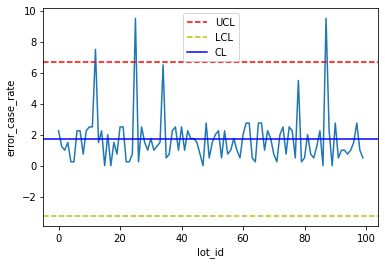

In [32]:
import matplotlib.pyplot as plt

plt.plot(df_5['error_case_rate'])
plt.axhline(y=ucl, color = 'r', linestyle = '--', label = 'UCL')
plt.axhline(y=lcl, color = 'y', linestyle = '--', label = 'LCL')
plt.axhline(y=cl, color = 'b', linestyle = '-', label = 'CL')
plt.legend()
plt.ylabel('error_case_rate')
plt.xlabel('lot_id')
plt.show()

# 문제 6
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품이 연관이 있는지 확인하라

### 6-1 연구가설과 귀무가설 작성

* 연구가설 : 두 상품은 연관이 있다. 즉, 연속적인 관측값이 임의적이지 않다.
* 귀무가설 : 두 상품은 연관이 없다. 즉, 연속적인 관측값이 임의적이다.

### 6-2 평균과 표준편차

### 6-3 가설 채택

In [33]:
# a = 0, b = 1로 보고 리스트 만들기

list = [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]

from statsmodels.sandbox.stats.runs import runstest_1samp

print(runstest_1samp(list, cutoff = "mean", correction = True))


from statsmodels.sandbox.stats.runs import Runs
import numpy as np

list = [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]
arr_list = np.array(list)

print(Runs(arr_list).runs_test())

(-0.3721438547031917, 0.7097857460625617)
(-0.3721438547031917, 0.7097857460625617)


z값이 -0.37정도, 이에 대한 p-value가 0.70이므로 유의수준 0.05 하에서 귀무가설을 채택한다.
즉, 두 상품은 연관이 없다고 할 수 있다.